In [214]:
import pandas as pd
import matplotlib.pyplot as plt

##### **City Parks**

Parks! This is the first sub-metric. Who doesn't love parks? You can go inside them, look around them, frolick in them, walk your pet or yourself in them, and more. Parks typically are expected to contain plenty of greenery and open, relaxing spaces that fit outdoor recreation like a glove. Human brains are still very much primitive; spending time surrounded by natural greenery is good for us whether we think we like it or not. Therefore, it is an undeniable fact of our ape brains that more parks means more greenery which means more happiness. From this we can dervie with simple inverse correlation that more parks equates to a less depressing place to live. Let us see which neighborhoods are the most equipped with these parks.

I love reading. Let's read the file.

In [7]:
parks = pd.read_csv("city-parks.csv")
parks.head(3)

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017


See now, I love reading, but not the things I don't need. Let us filter out the columns that we won't be needing.

In [21]:
parks[["name", "type", "neighborhood"]].head(5)

,name,type,neighborhood
0,Able Long Park,Park,Beechview
1,Albert Turk Graham Park,Park,Crawford-Roberts
2,Alcoa Park,Park,North Shore
3,Allegheny Commons,Park,Allegheny Center
4,Allegheny Landing Park,Park,North Shore


Much better. In addition to 

First, let us sort by `neighborhood` so we can easily count how many there are in each. Since parks are places, and a place can't be in two places at the same time, we only need to count the number of unique park names for each `neighborhood` to determine the amount in each. We can ignore the parks' `type` for the moment.

In [55]:
parks[["name", "neighborhood"]].groupby("neighborhood").count()

,name
neighborhood,
Allegheny Center,2
Allentown,2
Arlington,1
Banksville,2
Bedford Dwellings,1
...,...
Upper Lawrenceville,3
West End,2
West Oakland,1


Now, we want to sort this so the winner gets to go on top. The simplest way to do this is to use the `sort_values()` function. Watch out! Don't forget to specify the argument to sort by descending!

In [147]:
parksDF = parks[["name", "neighborhood"]].groupby("neighborhood").count().sort_values(by="name", ascending=False)
parksDF

,name
neighborhood,
East Liberty,12
Central Business District,10
Beechview,8
Point Breeze,7
South Side Slopes,7
...,...
Homewood West,1
Oakwood,1
Middle Hill,1


Now that is really nice, but since the type of park was easily made available for us, it is best we make some use of it. Five types are present, namely `Park`, `Traffic Island/Median`, `Monument/Memorial`, `Open Space`, and `Building Grounds`. Based on the typical size expected of each of these types--all of which are only estimates based on the *feel* I get from Google images--we apply a multiplier to adjust for their (expected) size differences relative to the largest type (`Park`) as well as the expected amount of greenery and nature.

In [173]:
weights = {"Park":1.0,
               "Traffic Island/Median":0.2,
              "Monument/Memorial":0.6,
              "Open Space":0.2,
              "Building Grounds":0.4}

Now, we iterate through each park to note its type and indicate the amount of each present for each neighborhood.

In [172]:
parksDF = parks[["name", "neighborhood"]].groupby("neighborhood").count().sort_values(by="name", ascending=False)

typeSeries = parks[["type", "neighborhood"]].loc[:, "type"]
neighborhoodSeries = parks[["type", "neighborhood"]].loc[:, "neighborhood"]

types = ["Park", "Traffic Island/Median", "Monument/Memorial", "Open Space", "Building Grounds"]

for i in range(len(typeSeries)):
    
    #create column if it doesn't exist
    if typeSeries[i] not in parksDF.columns:
        parksDF[typeSeries[i]] = 0
    
    parksDF.loc[neighborhoodSeries[i], typeSeries[i]] += 1
parksDF

,name,Park,Traffic Island/Median,Building Grounds,Monument/Memorial,Open Space
neighborhood,,,,,,
East Liberty,12,4,8,0,0,0
Central Business District,10,3,5,0,0,2
Beechview,8,6,1,0,1,0
Point Breeze,7,1,6,0,0,0
South Side Slopes,7,6,0,1,0,0
...,...,...,...,...,...,...
Homewood West,1,1,0,0,0,0
Oakwood,1,1,0,0,0,0
Middle Hill,1,1,0,0,0,0


Now we just apply the weights and sum them again.

In [178]:
parksDF["score"] = (parksDF["Park"]*weights["Park"] +
                    parksDF["Traffic Island/Median"]*weights["Traffic Island/Median"] +
                    parksDF["Building Grounds"]*weights["Building Grounds"] +
                    parksDF["Monument/Memorial"]*weights["Monument/Memorial"] +
                    parksDF["Open Space"]*weights["Open Space"])

parksDF = parksDF.sort_values(by="score", ascending=False)
parksDF

,name,Park,Traffic Island/Median,Building Grounds,Monument/Memorial,Open Space,score
neighborhood,,,,,,,
Beechview,8,6,1,0,1,0,6.8
South Side Slopes,7,6,0,1,0,0,6.4
East Liberty,12,4,8,0,0,0,5.6
Hazelwood,6,5,0,1,0,0,5.4
Mount Washington,6,5,0,1,0,0,5.4
...,...,...,...,...,...,...,...
Esplen,1,1,0,0,0,0,1.0
New Homestead,1,1,0,0,0,0,1.0
Hays,1,1,0,0,0,0,1.0


<Axes: xlabel='neighborhood'>

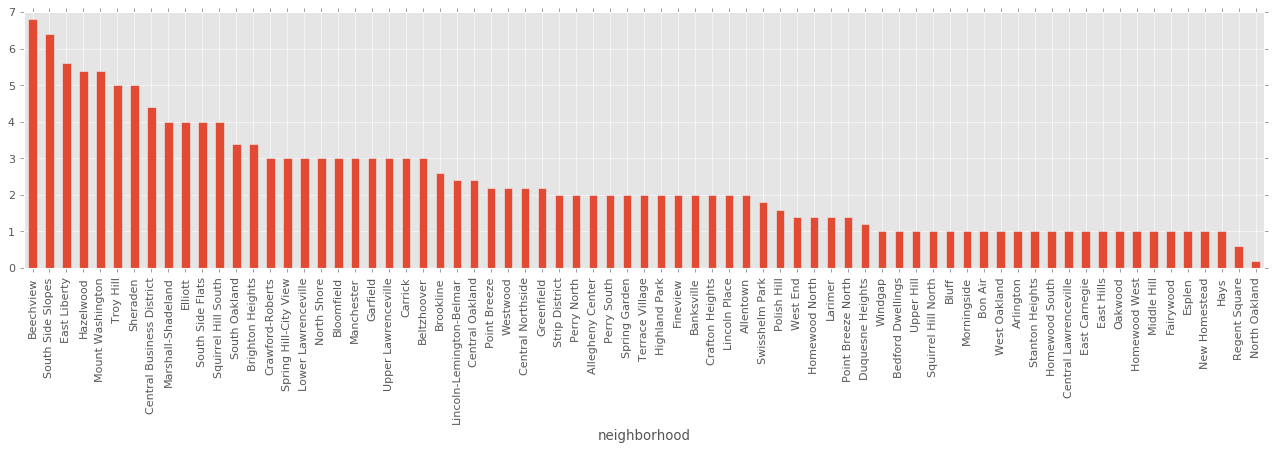

In [234]:
plt.style.use("ggplot")
parksDF["score"].plot.bar(figsize=(20,4))

The winner is Beechview.